<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/Autoencoder(MNIST_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1360
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0977
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0925
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0901
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


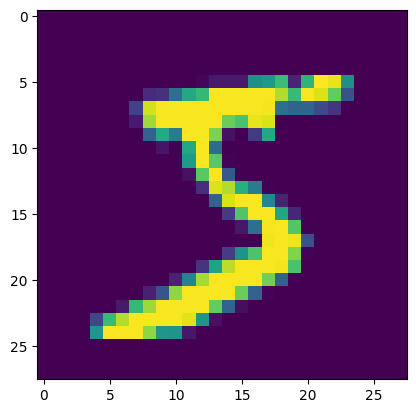

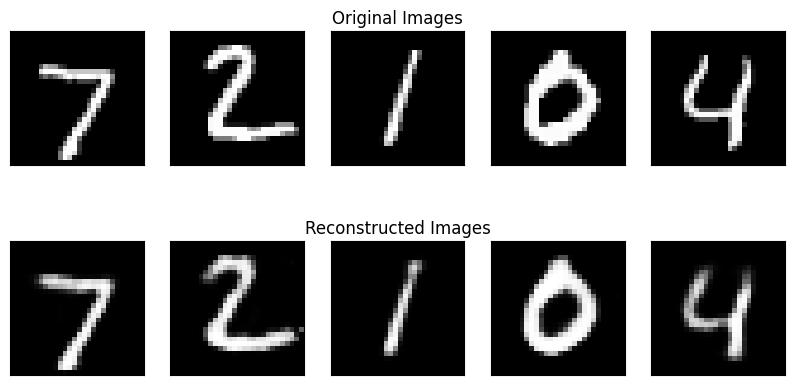

In [ ]:
# 출처 : https://benban.tistory.com/79
# 시각화를 위한 matplotlib 호출
# 연산을 위한 numpy 호출
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# autoencoder 결과물 플롯 함수
def plot_autoencoder_outputs(autoencoder, x, n, dims):
    """

    :param autoencoder: 학습된 autoencoder 모델
    :param x: image를 그려볼 데이터
    :param n: 몇 개의 image를 그릴것인지 n을 통해 전달
    :param dims: 이미지 plot을 위해 1차원 배열을 2차원으로 바꿔주어야 함
    :return:
    """
    decoded_imgs = autoencoder.predict(x)

    plt.figure(figsize=(10, 5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title('Original Images')
        if i == n // 2:
            ax.set_title('Original Images')

        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title('Reconstructed Images')
        if i == n // 2:
            ax.set_title('Reconstructed Images')

    plt.show()

# 내장 데이터셋 호출을 위한 함수 호출
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 차원 확인
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000, )
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape) # (10000, )

plt.imshow(X_train[0])

# 데이터 형태 및 유형 변경
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype(np.float32) / 255.0
X_jhk = X_test.reshape(-1, 28 * 28).astype(np.float32) / 255.0

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimension 설정
input_dim = X_train.shape[-1]
hidden_dim = 128
code_dim = 32


# 함수형 API 활용
input_img = Input(shape=(input_dim, ))
hidden_1 = Dense(hidden_dim, activation='relu')(input_img)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_img = Dense(input_dim, activation='sigmoid')(hidden_2)

# input과 output을 모델로 전달
autoencoder = Model(inputs=input_img, outputs=output_img)


# 모델 compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습 진행
autoencoder.fit(X_train, X_train, epochs=5)

plot_autoencoder_outputs(autoencoder, X_test, 5, (28, 28))
